In [46]:
from matplotlib import pyplot, patches
import csv
import os
from PIL import Image
from torchvision.models import ResNet101_Weights
import json
import math
import random
from mlt.preexperiments.data_readers import PreprocessScratch

In [4]:
def recalculate_pixels(target_pixels, image_size, preprocess):
    new_x, new_y = target_pixels
    image_x, image_y = image_size
    
    if len(preprocess.resize_size) == 1:
        resize_x = preprocess.resize_size[0]
        resize_y = preprocess.resize_size[0]
    else:
        resize_x, resize_y = preprocess.resize_size
    
    cropped_image_x = min(image_x, resize_x)
    cropped_image_y = min(image_y, resize_y)
    
    if preprocess.crop_size != None:
        new_x = float(new_x + ((cropped_image_x - preprocess.crop_size[0]) / 2))
        new_y = float(new_y + ((cropped_image_y - preprocess.crop_size[0]) / 2))

    new_x = float(new_x * (image_x / cropped_image_x))
    new_y = float(new_y * (image_y / cropped_image_y))
    
    return new_x, new_y

In [56]:
def show_picture(file, dataset_root_dir, number, preprocess, choose_random=True):
    with open(file, 'r', encoding='utf-8') as f:
        content = list(csv.reader(f, delimiter=','))[1:]

        if choose_random:
            images = random.sample(content, number)
        else:
            images = content[:number]
        
        number_cols = 3
        number_rows = math.ceil(number / number_cols)
        fig, ax = pyplot.subplots(nrows=number_rows, ncols=number_cols)
        fig.set_figwidth(5 * number_cols)
        fig.set_figheight(3 * number_rows)
        fig.tight_layout()
        
        for index, (image_id, x, y, target_x, target_y) in enumerate(images):            
            x, y, target_x, target_y = float(x), float(y), float(target_x), float(target_y)
            
            image = Image.open(os.path.join(dataset_root_dir, 'images/', image_id) + '.png')
            print(x,y)

            x, y = recalculate_pixels((x, y), image.size, preprocess)
            target_x, target_y = recalculate_pixels((target_x, target_y), image.size, preprocess)

            plot_x = int(index/number_cols)
            plot_y = index % number_cols

            if number_rows == 1:
                grid_coords = plot_y
            else:
                grid_coords = plot_x, plot_y

            ax[grid_coords].imshow(image)
            ax[grid_coords].set_title(image_id)
            ax[grid_coords].add_patch(patches.Circle((x, y), 5, linewidth=2, edgecolor='r', facecolor='none'))
            ax[grid_coords].add_patch(patches.Circle((target_x, target_y), 5, linewidth=2, edgecolor='g', facecolor='none'))

            ax[grid_coords].text(10, 20, f'distance: {round(math.dist((x, y), (target_x, target_y)), 2)}')

        pyplot.show()


In [6]:
def show_distribution(file, dataset_root_dir, preprocess):
    with open(file, 'r', encoding='utf-8') as f:
        content = csv.reader(f, delimiter=',')

        first_image_path = os.listdir(os.path.join(dataset_root_dir, 'images/'))[0]
        first_image = Image.open(os.path.join(dataset_root_dir, 'images/', first_image_path))
        image_size = first_image.size
        general_fig, general_ax = pyplot.subplots()
        general_ax.imshow(first_image)

        next(content)
        for image_id, x, y, target_x, target_y in content:            
            x, y, target_x, target_y = float(x), float(y), float(target_x), float(target_y)

            x, y = recalculate_pixels((x, y), image_size, preprocess)
            target_x, target_y = recalculate_pixels((target_x, target_y), image_size, preprocess)

            general_ax.add_patch(patches.Circle((x, y), 1, linewidth=2, edgecolor='r', facecolor='none'))
            general_ax.add_patch(patches.Circle((target_x, target_y), 1, linewidth=2, edgecolor='g', facecolor='none'))

        pyplot.show()


In [58]:
preprocess_pretrained = ResNet101_Weights.DEFAULT.transforms()
preprocess_scratch = PreprocessScratch(250)

In [59]:
# project_root_dir = '/home/guskunkdo@GU.GU.SE/MLT_Master-Thesis/'
project_root_dir = '/home/dominik/Nextcloud/020_Masterstudium/Language Technology/LT2402_Master Thesis/experiments/pre-experiments/'
# project_root_dir = '/home/dominik/Development/MLT_Master-Thesis/out/'
model_dir = os.path.join(project_root_dir, 'coordinate_predictor/dale/2023-11-11_05-35-18_dale_attribute_coordinate_predictor_dale-5_300_2048_1500_15_0.0001/')
# dataset_image_dir = '/scratch/guskunkdo/clevr-images-unambigous-colour/'
dataset_image_dir = '/home/dominik/Development/clevr-images-unambigous-dale/'
preprocess = preprocess_pretrained

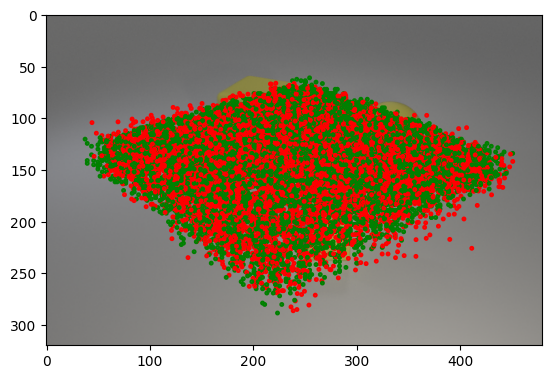

In [34]:
show_distribution(os.path.join(model_dir, 'train_outputs.csv'), dataset_image_dir, preprocess)

73.3328857421875 93.59130096435547
95.8514633178711 107.50955200195312
71.83349609375 101.3431625366211


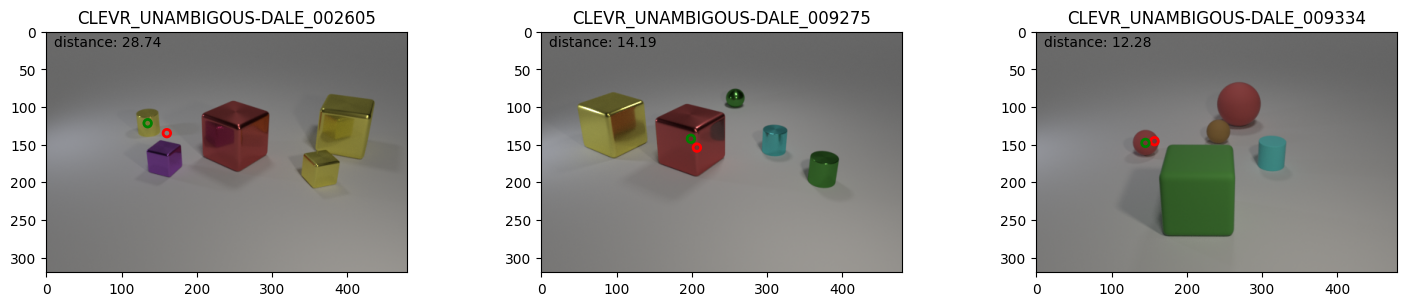

In [60]:
show_picture(os.path.join(model_dir, 'train_outputs.csv'), dataset_image_dir, 3, preprocess)

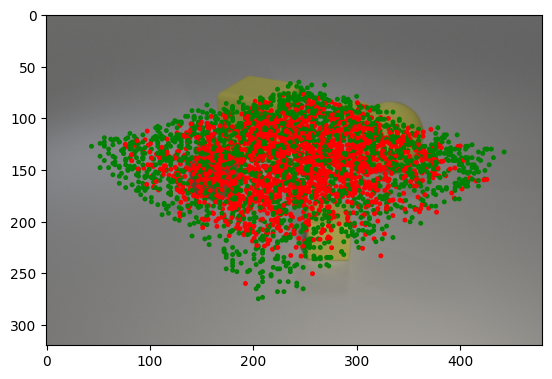

In [36]:
show_distribution(os.path.join(model_dir, 'test_outputs.csv'), dataset_image_dir, preprocess)

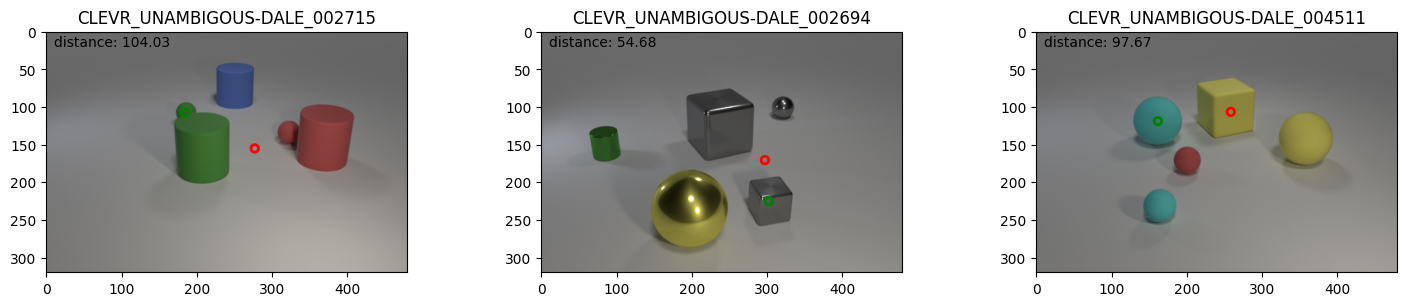

In [37]:
show_picture(os.path.join(model_dir, 'test_outputs.csv'), dataset_image_dir, 3, preprocess)

# Attention

In [212]:
# project_root_dir = '/home/guskunkdo@GU.GU.SE/MLT_Master-Thesis/'
# project_root_dir = '/home/dominik/Nextcloud/020_Masterstudium/Language Technology/LT2402_Master Thesis/experiments/pre-experiments/'
project_root_dir = '/home/dominik/Development/MLT_Master-Thesis/out/'
model_dir = os.path.join(project_root_dir, '2023-12-02_18-53-32_dale_attribute_attention_predictor_colour/')
# dataset_image_dir = '/scratch/guskunkdo/clevr-images-unambigous-colour/'
dataset_image_dir = '/home/dominik/Development/clevr-images-unambigous-colour/'
preprocess = preprocess_pretrained

In [183]:
def recalculate_edge(edge, image_size, preprocess):
    x, y = edge

    resize_x = preprocess.resize_size[0] * image_size[0] / min(image_size[1], image_size[0])
    resize_y = preprocess.resize_size[0] * image_size[1] / min(image_size[1], image_size[0])

    new_x = (x + ((resize_x - preprocess.crop_size[0]) / 2)) * image_size[0] / resize_x
    new_y = (y + ((resize_y - preprocess.crop_size[0]) / 2)) * image_size[1] / resize_y

    return new_x, new_y

In [203]:
def show_attention_picture(file, dataset_root_dir, number, preprocess, choose_random=True):
    with open(file, 'r', encoding='utf-8') as f:
        content = list(csv.reader(f, delimiter=','))[1:]

        if choose_random:
            images = random.sample(content, number)
        else:
            images = content[:number]
        
        number_cols = 3
        number_rows = math.ceil(number / number_cols)
        fig, ax = pyplot.subplots(nrows=number_rows, ncols=number_cols)
        fig.set_figwidth(5 * number_cols)
        fig.set_figheight(3 * number_rows)
        fig.tight_layout()
        
        for index, (image_id, predicted, target) in enumerate(images): 
            predicted = [float(region) for region in predicted.removeprefix('[').removesuffix(']').split(';')]         
            target = [float(region) for region in target.removeprefix('[').removesuffix(']').split(';')] 
            
            image = Image.open(os.path.join(dataset_root_dir, 'images/', image_id) + '.png')
            with open(os.path.join(dataset_root_dir, 'scenes/', image_id) + '.json', 'r', encoding='utf-8') as f:
                scene = json.load(f)
            target_object = scene['objects'][0] 
            target_object_string = f"{target_object['size']} {target_object['color']} {target_object['shape']}"

            number_regions = math.sqrt(len(predicted))
            region_size = preprocess.crop_size[0] / number_regions
            area_size = number_regions * region_size

            area_start_x, area_start_y = recalculate_edge((0,0), image.size, preprocess)
            area_end_x, area_end_y = recalculate_edge((area_size,area_size), image.size, preprocess)

            plot_x = int(index/number_cols)
            plot_y = index % number_cols

            if number_rows == 1:
                grid_coords = plot_y
            else:
                grid_coords = plot_x, plot_y

            ax[grid_coords].imshow(image)
            ax[grid_coords].set_title(image_id)
            ax[grid_coords].add_patch(patches.Rectangle(
                (area_start_x, area_start_y),
                area_end_x - area_start_x,
                area_end_y - area_start_y,
                facecolor='none',
                linewidth=1,
                edgecolor='black'
            ))

            # prerequiste: target is a rectangle
            start_region = target.index(1)
            end_region = len(target) - 1 - target[::-1].index(1)

            region_start_x = (start_region % number_regions) * region_size
            region_start_y = int(start_region / number_regions) * region_size
            region_end_x = (end_region % number_regions) * region_size + region_size
            region_end_y = int(end_region / number_regions) * region_size + region_size
            region_end_x, region_end_y = recalculate_edge((region_end_x, region_end_y), image.size, preprocess)
            region_start_x, region_start_y = recalculate_edge((region_start_x, region_start_y), image.size, preprocess)

            ax[grid_coords].add_patch(patches.Rectangle(
                (region_start_x, region_start_y),
                region_end_x - region_start_x,
                region_end_y - region_start_y,
                edgecolor='green',
                linewidth=2,
                facecolor='none'
            ))

            for region_index, region in enumerate(predicted):
                # print(f"{region_index=}", f"{region=}")
                region_start_x = (region_index % number_regions) * region_size
                region_start_y = int(region_index / number_regions) * region_size
                region_end_x ,region_end_y =  recalculate_edge(
                    (region_start_x + region_size, 
                     region_start_y + region_size),
                    image.size,
                    preprocess
                )
                region_start_x, region_start_y = recalculate_edge((region_start_x, region_start_y), image.size, preprocess)

                # print(f"{region_start_x=}", f"{region_start_y=}")
                # print(f"{region_end_x=}", f"{region_end_y=}")

                ax[grid_coords].add_patch(patches.Rectangle(
                    (region_start_x, region_start_y),
                    region_end_x - region_start_x,
                    region_end_y - region_start_y,
                    facecolor='r',
                    alpha=min(1, region * 1.6)
                ))
        

                ax[grid_coords].text(10, 20, target_object_string)


        pyplot.show()


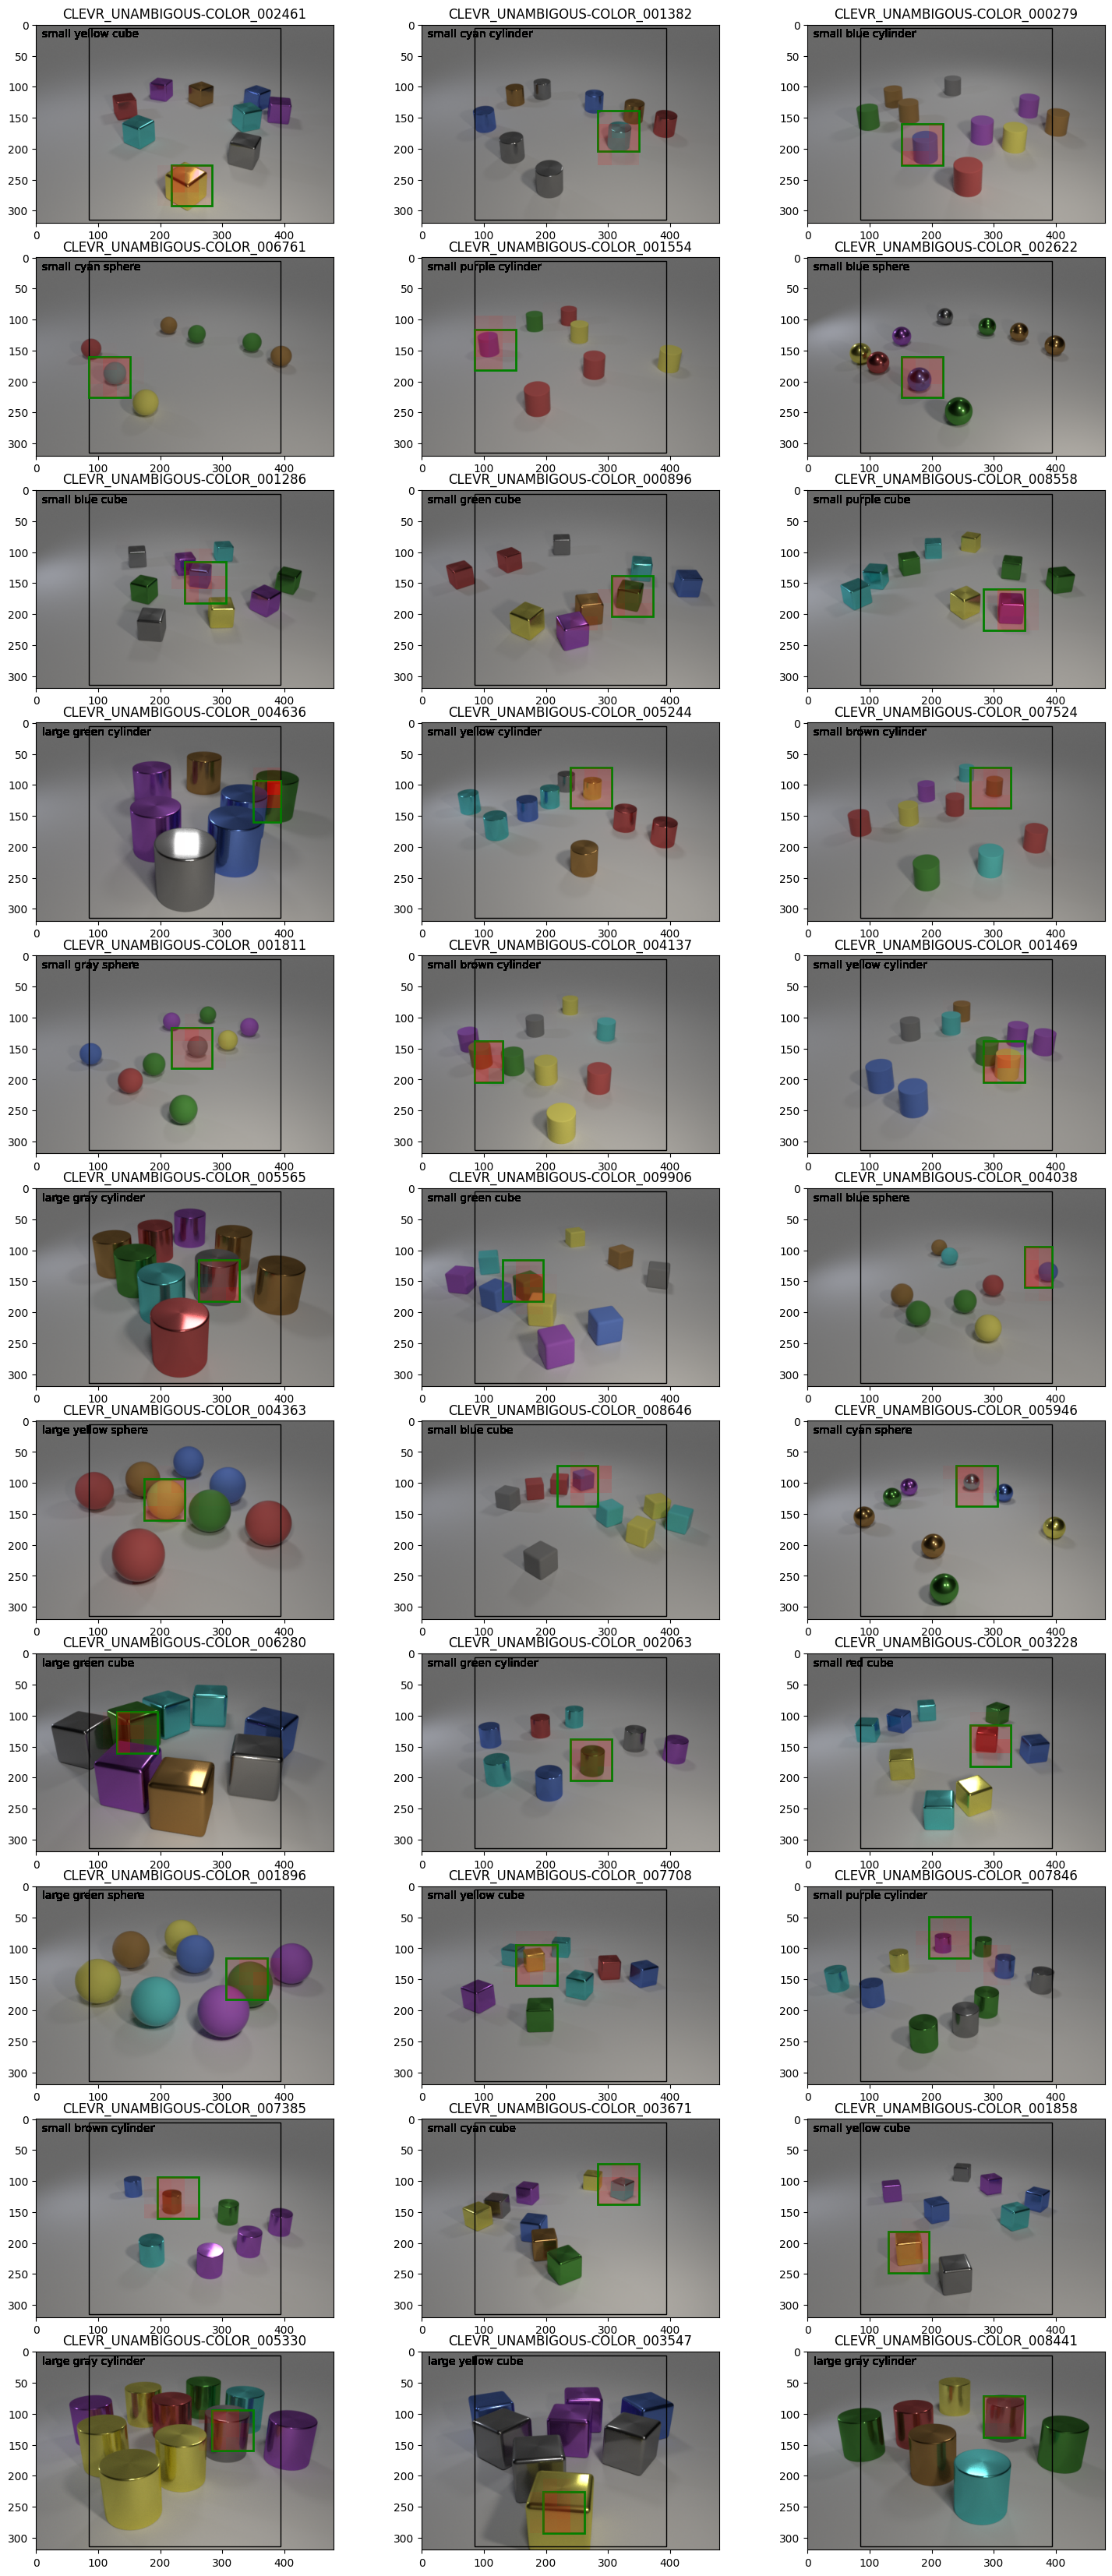

In [214]:
show_attention_picture(os.path.join(model_dir, 'test_outputs.csv'), dataset_image_dir, 33, preprocess)

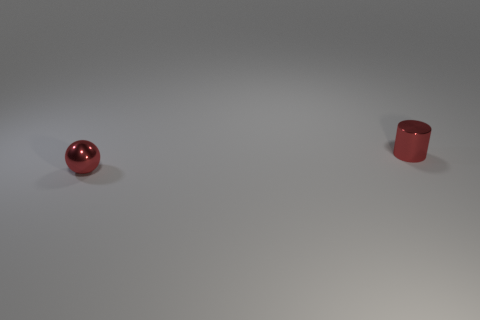

In [171]:
image = Image.open(os.path.join(dataset_image_dir, 'images/', 'CLEVR_UNAMBIGOUS-DALE-TWO_007252') + '.png').convert('RGB')
image

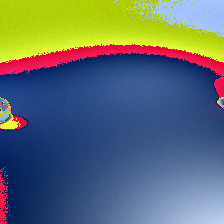

In [172]:
from torchvision.transforms import ToPILImage
preprocessed = preprocess(image)
to_pil = ToPILImage()
to_pil(preprocessed)